# Import Packages

In [1]:
import numpy as np
import nibabel as nib
from mvlearn.embed import GCCA
from graspy.plot import pairplot
from matplotlib import pyplot as plt
import  warnings ; warnings.simplefilter('ignore')
%matplotlib inline

# load surfaces and cortex label

In [2]:
surf_lh = nib.freesurfer.read_geometry('DanielData/fsaverage5/surf/lh.inflated')
surf_rh = nib.freesurfer.read_geometry('DanielData/fsaverage5/surf/rh.inflated')

cort_lh = nib.freesurfer.read_label('DanielData/fsaverage5/label/lh.cortex.label')
cort_rh = nib.freesurfer.read_label('DanielData/fsaverage5/label/rh.cortex.label')
cort = np.concatenate((cort_lh, cort_rh + 10242))

# load subject timeseries

In [3]:
data = []
subjs = ['010005', '010017', '010018', '010021', '010024', '010032', '010042', '010056', '010060']
for s in subjs:
    data.append(np.load('DanielData/timeseries.sub-%s.npy' % s))
print(np.shape(data))

(9, 18715, 2608)


# Running GCCA

In [4]:
gcca = GCCA()
gcca.fit(data)
projs = gcca.transform(data)

print(gcca.ranks_)
print(np.shape(projs))

np.save('gcca_results.npy', projs)

(6, 8, 6, 7, 5, 7, 7, 8, 6)
(9, 18715, 5)


# set visualization parameters

In [5]:
n_comps = np.shape(projs)[2]
if n_comps > 5:  # set max number of components to show at 5
    n_comps = 5

n_subs = np.shape(projs)[0]

n_views = 4  # number of brains to show per component
fig_width = 10

# Plot pairwise components for group averages

In [6]:
labels = []
for i in subjs:
   for j in range(projs[0].shape[0]):
       labels.append(i)

col_g = ['G1', 'G2', 'G3', 'G4', 'G5']

# Average Plot

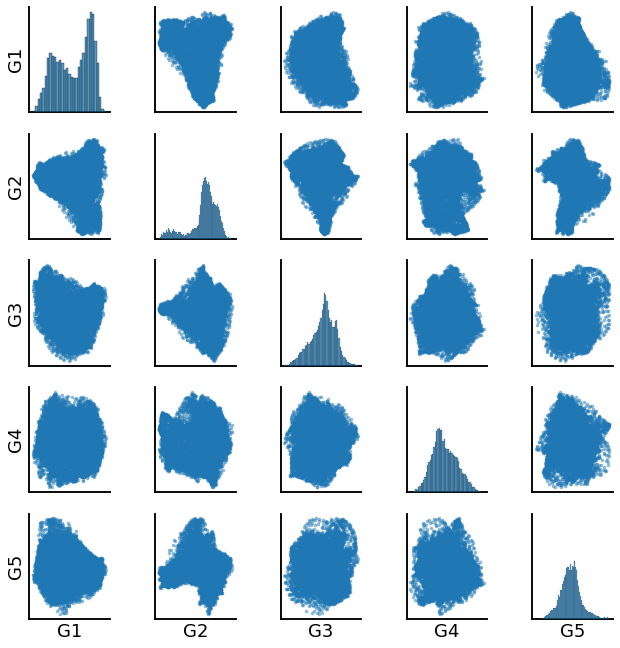

In [7]:
pairplot(np.mean(np.asarray(projs[:,:,:n_comps]), axis=0), col_names =list(col_g),height=2, alpha=0.5)
plt.show()


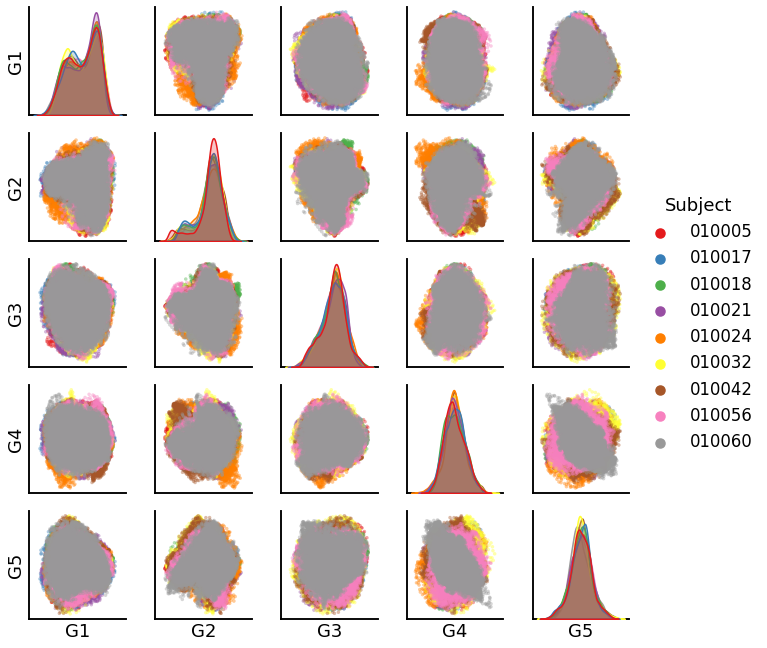

In [8]:
pairplot(np.vstack(projs[:,:,:n_comps]),col_names = col_g, labels=labels, height=2,
         legend_name='Subject', alpha=0.4)
filename = 'SubMatrix1.png'
plt.savefig(filename, dpi=400)
plt.show()
